In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import glob
import os

# --- Ruta de los datos ---
data_path = "../resultados_2D/TISE"  # Cambia a tu ruta

# --- Leer energías ---
energies = np.loadtxt(os.path.join(data_path, "energies.txt"))
print("Energías encontradas:\n", energies)


Energías encontradas:
 [[ 0.      9.8027]
 [ 1.     24.1097]
 [ 2.     24.1097]
 [ 3.     38.4166]
 [ 4.     46.6632]]


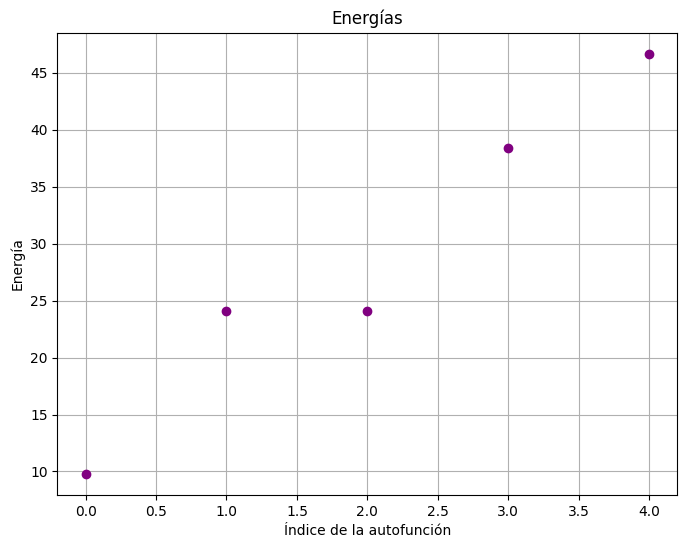

In [5]:

# --- Graficar energías ---
plt.figure(figsize=(8, 6))
plt.plot(energies[:, 0], energies[:, 1], 'o', color='purple')
plt.xlabel("Índice de la autofunción")
plt.ylabel("Energía")
plt.title("Energías")
plt.grid()
plt.show()


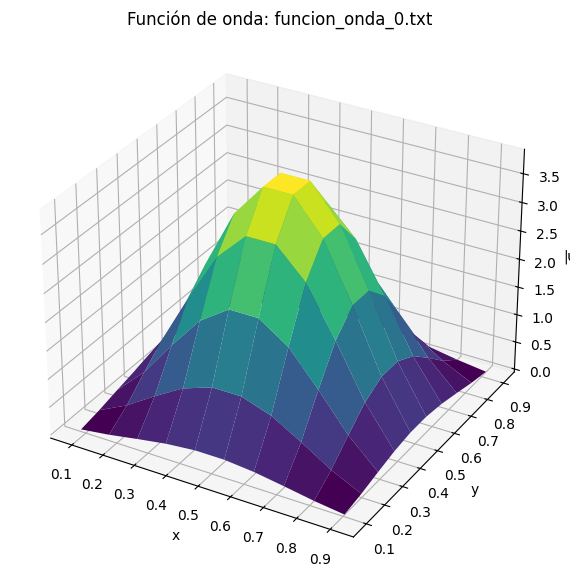

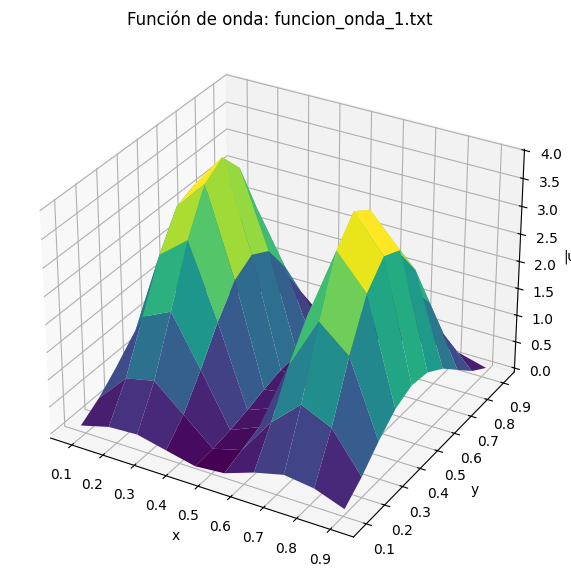

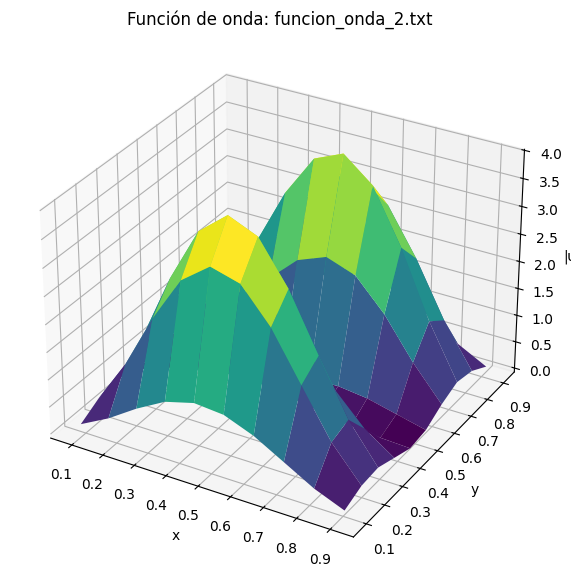

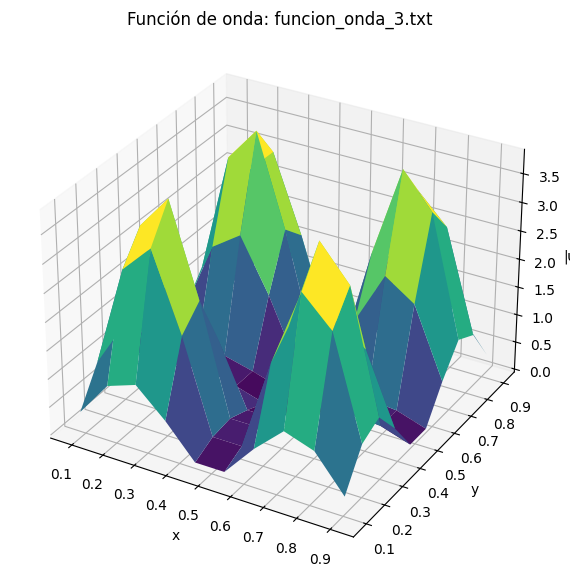

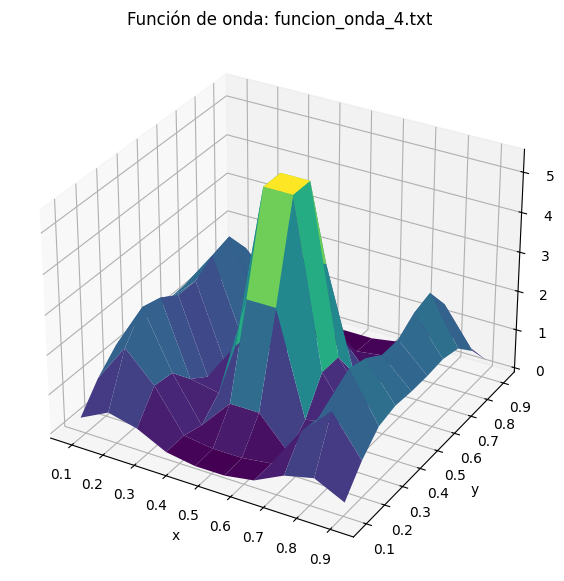

In [6]:

# --- Archivos de funciones de onda ---
wave_files = sorted(glob.glob(os.path.join(data_path, "funcion_onda_*.txt")))

# --- Leer y graficar cada función ---
for file in wave_files:
    psi_data = np.loadtxt(file)
    # Cada fila: x, y, psi(x,y)
    x = psi_data[:, 0]
    y = psi_data[:, 1]
    psi = psi_data[:, 2]
    prob = psi**2

    # Determinar la malla
    Nx = len(np.unique(x))
    Ny = len(np.unique(y))
    X = x.reshape(Nx, Ny)
    Y = y.reshape(Nx, Ny)
    Z = prob.reshape(Nx, Ny)

    fig = plt.figure(figsize=(8, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('|ψ|²')
    ax.set_title(f"Función de onda: {os.path.basename(file)}")
    plt.show()
